In [1]:
import tensorflow as tf
print(tf.__version__)


2.15.0-dev20230825


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [4]:
X_train = x_train.reshape(60000, 784)
X_train = X_train.astype('float32')
X_train /= 255
X_test = x_test.reshape(10000, 784)
X_test = X_test.astype('float32')
X_test /= 255
print("X Training matrix shape", X_train.shape)
print("X Testing matrix shape", X_test.shape)

X Training matrix shape (60000, 784)
X Testing matrix shape (10000, 784)


In [5]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
print("Y Training matrix shape", Y_train.shape)
print("Y Testing matrix shape", Y_test.shape)

Y Training matrix shape (60000, 10)
Y Testing matrix shape (10000, 10)


In [6]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 0.2231 - accuracy: 0.9359
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0823 - accuracy: 0.9748
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0520 - accuracy: 0.9838
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0361 - accuracy: 0.9882
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0260 - accuracy: 0.9913
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0234 - accuracy: 0.9923
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0182 - accuracy: 0.9940
Epoch 8/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0147 - accuracy: 0.9949
Epoch 9/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0130 - accuracy: 0.9958
Epoch 10/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0105 - accuracy: 0.9966

In [8]:
predicted_classes = np.argmax(model.predict(X_test), axis=1)
correct_indices = np.nonzero(predicted_classes==y_test)[0]
incorrect_indices = np.nonzero(predicted_classes!=y_test)[0]

313/313 [==============================] - 0s 1ms/step


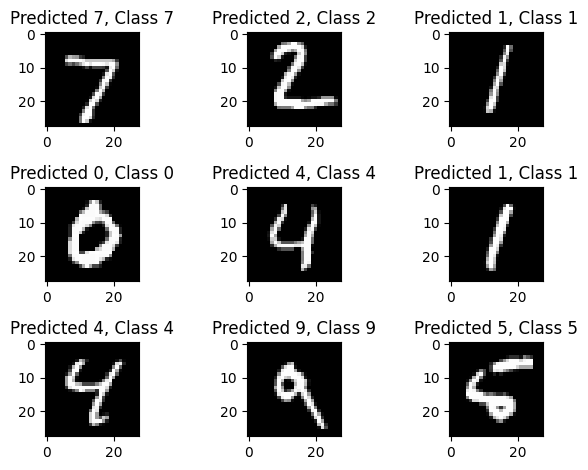

In [13]:
plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    correct = correct_indices[i]
    plt.imshow(X_test[correct].reshape(28,28),cmap='gray')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
plt.tight_layout()

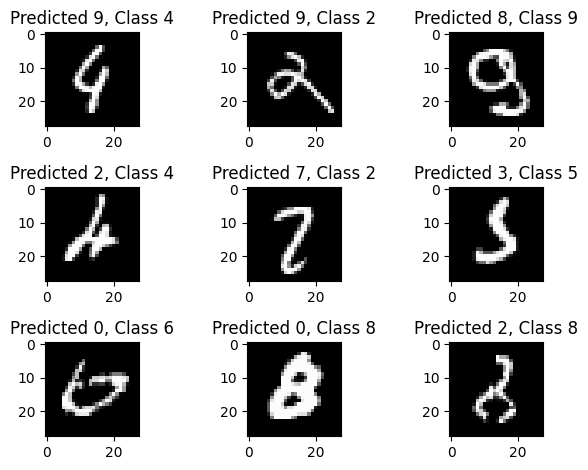

In [14]:
plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    correct = incorrect_indices[i]
    plt.imshow(X_test[correct].reshape(28,28),cmap='gray')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
plt.tight_layout()